In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load data from CSV file (replace 'your_file.csv' with the actual file path)
csv_file_path = "datafile1.csv"
df = pd.read_csv(csv_file_path)

In [3]:
# Transpose the data to have years as rows and crops as columns
df = df.set_index("Year").T

In [4]:
# Extract features (years) and target (crop values) for all crops
X = np.arange(len(df)).reshape(-1, 1)
y = df.values

In [5]:
# Initialize Gradient Boosting models for each crop
models = {}
for crop in df.columns:
    model = GradientBoostingRegressor()  # Use Gradient Boosting
    model.fit(X, y[:, df.columns.get_loc(crop)])
    models[crop] = model

In [6]:
# Initialize linear regression models for each crop
models = {}
for crop in df.columns:
    model = LinearRegression()
    model.fit(X, y[:, df.columns.get_loc(crop)])
    models[crop] = model

In [7]:
# Predict crop values for 2012-13 and 2013-14
years_to_predict = np.array([[2012], [2013]])
predicted_values = {}
for crop, model in models.items():
    predicted_values[crop] = model.predict(years_to_predict)

In [8]:
for crop, values in predicted_values.items():
    print(f"{crop} values for 2012-13 and 2013-14:")
    print(f"2012-13: {values[0]:.2f}")
    print(f"2013-14: {values[1]:.2f}")
    print()

Rice values for 2012-13 and 2013-14:
2012-13: 5440.21
2013-14: 5442.87

Wheat values for 2012-13 and 2013-14:
2012-13: 4846.82
2013-14: 4849.18

Coarse Cereals values for 2012-13 and 2013-14:
2012-13: 8819.25
2013-14: 8823.58

Pulses values for 2012-13 and 2013-14:
2012-13: 9306.96
2013-14: 9311.54

Vegetables  values for 2012-13 and 2013-14:
2012-13: 6282.71
2013-14: 6285.79

Fruits values for 2012-13 and 2013-14:
2012-13: 5532.11
2013-14: 5534.81

Milk values for 2012-13 and 2013-14:
2012-13: 8235.89
2013-14: 8239.94

Eggs, Fish and Meat values for 2012-13 and 2013-14:
2012-13: 11062.11
2013-14: 11067.56

Oilseeds values for 2012-13 and 2013-14:
2012-13: 3444.50
2013-14: 3446.17

Sugarcane  values for 2012-13 and 2013-14:
2012-13: 1935.00
2013-14: 1935.92

Fibers values for 2012-13 and 2013-14:
2012-13: 13762.14
2013-14: 13768.94

All Agriculture values for 2012-13 and 2013-14:
2012-13: 7712.36
2013-14: 7716.14



In [9]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

# Evaluate model accuracy
for crop, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[:, df.columns.get_loc(crop)], y_pred)
    r2 = r2_score(y_test[:, df.columns.get_loc(crop)], y_pred)
    print(f"{crop} - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")

Rice - Mean Squared Error: 39.66, R2 Score: 0.60
Wheat - Mean Squared Error: 75.83, R2 Score: 0.55
Coarse Cereals - Mean Squared Error: 2.45, R2 Score: 0.96
Pulses - Mean Squared Error: 113.45, R2 Score: 0.69
Vegetables  - Mean Squared Error: 20.21, R2 Score: 0.64
Fruits - Mean Squared Error: 10.76, R2 Score: -0.72
Milk - Mean Squared Error: 0.43, R2 Score: 0.99
Eggs, Fish and Meat - Mean Squared Error: 15.77, R2 Score: 0.68
Oilseeds - Mean Squared Error: 29.47, R2 Score: 0.59
Sugarcane  - Mean Squared Error: 111.28, R2 Score: -0.98
Fibers - Mean Squared Error: 75.92, R2 Score: -0.35
All Agriculture - Mean Squared Error: 0.20, R2 Score: 1.00


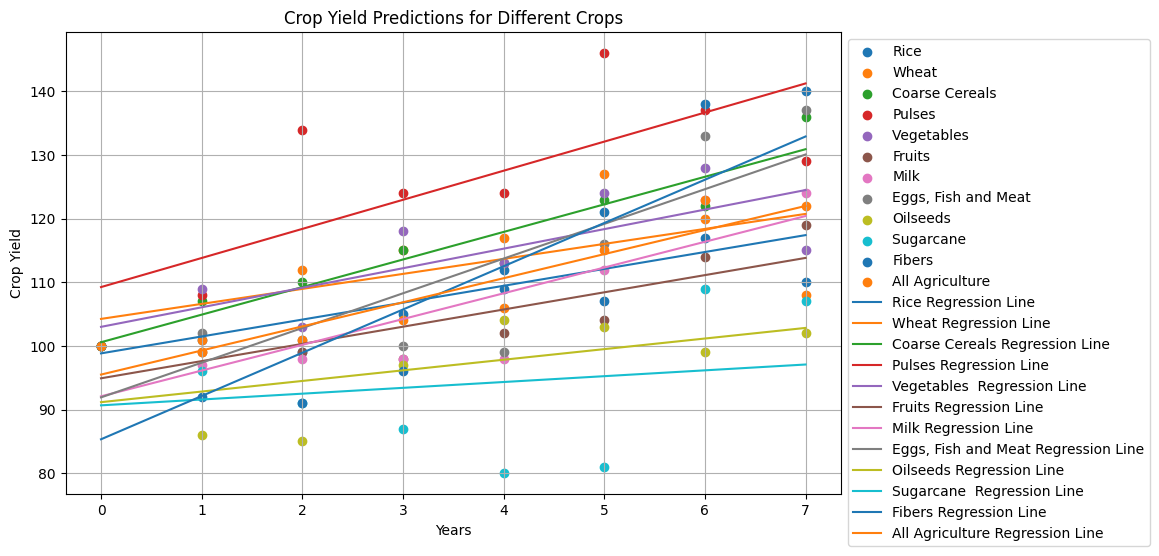

In [11]:
import matplotlib.pyplot as plt

# Initialize subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot historical data points for each crop
for crop in df.columns:
    ax.scatter(X, y[:, df.columns.get_loc(crop)], label=crop)

# Plot regression lines for each crop
for crop in df.columns:
    ax.plot(X, models[crop].predict(X), label=f"{crop} Regression Line")

ax.set_title("Crop Yield Predictions for Different Crops")
ax.set_xlabel("Years")
ax.set_ylabel("Crop Yield")

# Adjust legend position (you can modify the values as needed)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

ax.grid(True)
plt.show()
